<a href="https://colab.research.google.com/github/Mr-Royce-IV/Tv_Shows-Research-Projectt/blob/main/TheOffice_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section: Setting up && cleaning dataset

In [9]:
#Importing All neccessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
# Set seed for reproducibility
random.seed(123)
np.random.seed(123)

# Function to introduce random NaNs
def introduce_nan(series, nan_fraction=0.1):
    n_nan = int(len(series) * nan_fraction)
    nan_indices = random.sample(range(len(series)), n_nan)
    series.iloc[nan_indices] = np.nan
    return series

# Create sample data
data = np.random.rand(10, 10)  # 10x10 matrix with random values

# importing nltk
import nltk
nltk.download("popular")

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from scipy import stats

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [10]:
#Forming & checking the office DataFrame
url = 'https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv'
office_df = pd.read_csv(url)

office_df.head()
#office_df.tail()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24,0.285714,0.134552,2.15
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24,0.000000,0.461880,0.00
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24,0.428571,0.603738,0.50
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24,0.000000,0.244949,0.00
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24,0.400000,0.000000,1.60


In [11]:
#Checking for dataframe issues
office_df.info()

office_df.describe()

office_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    55130 non-null  int64  
 1   season                   55130 non-null  int64  
 2   episode                  55130 non-null  int64  
 3   episode_name             55130 non-null  object 
 4   director                 55130 non-null  object 
 5   writer                   55130 non-null  object 
 6   character                55130 non-null  object 
 7   text                     54753 non-null  object 
 8   text_w_direction         55125 non-null  object 
 9   imdb_rating              55130 non-null  float64
 10  total_votes              55130 non-null  int64  
 11  air_date                 55130 non-null  object 
 12  sentimentAnalysis_score  51718 non-null  float64
 13  sentimentr_score         55130 non-null  float64
 14  syuzhet_score         

,0
index,0
season,0
episode,0
episode_name,0
director,0
writer,0
character,0
text,377
text_w_direction,5
imdb_rating,0


In [12]:
#Use statistical methods to identify and handle outliers(haven't had much use of them)

outlier_character = office_df[(pd.to_numeric(office_df['character'], errors='coerce') < 13) | (pd.to_numeric(office_df['character'], errors='coerce') > 20)]
print(outlier_character)

outlier_writer = office_df[(pd.to_numeric(office_df['writer'], errors='coerce') < 13) | (pd.to_numeric(office_df['writer'], errors='coerce') > 20)]

outlier_episode_name = office_df[(pd.to_numeric(office_df['episode_name'], errors='coerce') < 13) | (pd.to_numeric(office_df['episode_name'], errors='coerce') > 20)]

outlier_director = office_df[(pd.to_numeric(office_df['director'], errors='coerce') < 13) | (pd.to_numeric(office_df['director'], errors='coerce') > 20)]

outlier_text = office_df[(pd.to_numeric(office_df['text'], errors='coerce') < 13) | (pd.to_numeric(office_df['text'], errors='coerce') > 20)]

outlier_text_w_direction = office_df[(pd.to_numeric(office_df['text_w_direction'], errors='coerce') < 13) | (pd.to_numeric(office_df['text_w_direction'], errors='coerce') > 20)]

outlier_air_date = office_df[(pd.to_numeric(office_df['air_date'], errors='coerce') < 13) | (pd.to_numeric(office_df['air_date'], errors='coerce') > 20)]

outlier_imdb_rating = office_df[(pd.to_numeric(office_df['imdb_rating'], errors='coerce') < 13) | (pd.to_numeric(office_df['imdb_rating'], errors='coerce') > 20)]


#outlier_grade = df[(pd.to_numeric(df['grade'], errors='coerce') < 13) | (pd.to_numeric(df['grade'], errors='coerce') > 20)]
#print(outlier_grade)

Empty DataFrame
Columns: [index, season, episode, episode_name, director, writer, character, text, text_w_direction, imdb_rating, total_votes, air_date, sentimentAnalysis_score, sentimentr_score, syuzhet_score]
Index: []


In [13]:
#still outliers but with ISNA

outlier_sentimentAnalysis = office_df[(office_df['sentimentAnalysis_score'].isna()) | (office_df['sentimentAnalysis_score'] == 'incomplete')]
print(outlier_sentimentAnalysis)

       index  season  episode episode_name    director  \
9         10       1        1        Pilot  Ken Kwapis   
24        25       1        1        Pilot  Ken Kwapis   
44        45       1        1        Pilot  Ken Kwapis   
85        86       1        1        Pilot  Ken Kwapis   
86        87       1        1        Pilot  Ken Kwapis   
...      ...     ...      ...          ...         ...   
55032  55033       9       24       Finale  Ken Kwapis   
55050  55051       9       24       Finale  Ken Kwapis   
55082  55083       9       24       Finale  Ken Kwapis   
55089  55090       9       24       Finale  Ken Kwapis   
55100  55101       9       24       Finale  Ken Kwapis   

                                            writer character  \
9      Ricky Gervais;Stephen Merchant;Greg Daniels       Pam   
24     Ricky Gervais;Stephen Merchant;Greg Daniels   Michael   
44     Ricky Gervais;Stephen Merchant;Greg Daniels   Michael   
85     Ricky Gervais;Stephen Merchant;Greg Dani

In [14]:
#dropping null objects & inputting null ints/floats
mean_sentiment = office_df['sentimentAnalysis_score'].median()
office_df['sentimentAnalysis_score'] = office_df['sentimentAnalysis_score'].fillna(mean_sentiment)

office_df_clean = office_df.dropna(subset=['text', 'text_w_direction'])

office_df_clean.columns

office_df_clean.drop('index', axis=1)

office_df_clean.isnull().sum()




#office_df_clean['sentimentAnalysis_score']
#office_df.head()
#office_df.info()
#office_df.dropna(inplace=True)
#office_df.fillna({'sentimentAnalysis_score': 'Incomplete'})
#mean_age = messy_df['age'].mean()
#mean_age
#messy_df['age'] = messy_df['age'].fillna(mean_age)
#messy_df['age']

,0
index,0
season,0
episode,0
episode_name,0
director,0
writer,0
character,0
text,0
text_w_direction,0
imdb_rating,0


In [15]:
#dropping duplicates

office_df_clean = office_df_clean.drop_duplicates()

# Find the pearson correlations matrix
print(office_df_clean.corr(numeric_only=True))

#print(office_df_clean)

                            index    season   episode  imdb_rating  \
index                    1.000000  0.990374  0.222957    -0.345286   
season                   0.990374  1.000000  0.115315    -0.357501   
episode                  0.222957  0.115315  1.000000     0.201713   
imdb_rating             -0.345286 -0.357501  0.201713     1.000000   
total_votes             -0.311300 -0.337931  0.072306     0.678289   
sentimentAnalysis_score -0.003609 -0.005462  0.008027     0.003100   
sentimentr_score        -0.018369 -0.018237 -0.008529     0.011136   
syuzhet_score           -0.008501 -0.011267  0.005381     0.003375   

                         total_votes  sentimentAnalysis_score  \
index                      -0.311300                -0.003609   
season                     -0.337931                -0.005462   
episode                     0.072306                 0.008027   
imdb_rating                 0.678289                 0.003100   
total_votes                 1.000000        

In [16]:
#Cleaning Text_with_direction mainly lowercasing && removing special characters

#Variable with vaniella textwdir(uppercases && special characters)
office_df_textwdir_backup = office_df_clean['text_w_direction']

office_df_clean['text_w_direction'].str.lower()

office_df_clean['text_w_direction'] = office_df_clean['text_w_direction'].str.replace('\W', '', regex=True)

In [17]:
#standardize Code
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
numerical_cols = office_df_clean.select_dtypes(include=np.number).columns
df_numerical = office_df_clean[numerical_cols]

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

print("7. Standardizing Data:")
display(df_scaled.head())
print("\n")

quantiles = df_scaled.quantile([0.25, 0.5, 0.75])
iqr = quantiles.loc[0.75] - quantiles.loc[0.25]

print("Quantiles and IQR:")
display(quantiles)
print('\nIQR:')
display(iqr)

7. Standardizing Data:


,index,season,episode,imdb_rating,total_votes,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0,-1.731734,-1.936946,-1.58406,-1.277134,1.716176,0.625381,0.281191,2.687800
1,-1.731671,-1.936946,-1.58406,-1.277134,1.716176,-0.296698,1.523321,-0.340612
2,-1.731608,-1.936946,-1.58406,-1.277134,1.716176,1.086421,2.061639,0.363670
3,-1.731545,-1.936946,-1.58406,-1.277134,1.716176,-0.296698,0.700120,-0.340612
4,-1.731482,-1.936946,-1.58406,-1.277134,1.716176,0.994213,-0.229403,1.913090




Quantiles and IQR:


,index,season,episode,imdb_rating,total_votes,sentimentAnalysis_score,sentimentr_score,syuzhet_score
0.25,-0.866333,-1.083094,-0.898615,-0.731248,-0.605696,-0.296698,-0.229403,-0.340612
0.50,0.000765,0.197685,-0.076082,-0.003400,-0.237199,-0.296698,-0.229403,-0.340612
0.75,0.866795,0.624612,0.883540,0.724449,0.256745,0.348758,0.244942,0.504526



IQR:


,0
index,1.733127
season,1.707705
episode,1.782155
imdb_rating,1.455697
total_votes,0.862442
sentimentAnalysis_score,0.645455
sentimentr_score,0.474345
syuzhet_score,0.845138


#Potential Research Questions

Main potential question: How character interaction and dialgoue sentiment evolves across seasons and how it reveals about the overall shift in narrative and character development trends?

1. Which characters have the most emotionally charged dialogue?

2. Who's the characters with the most and least dialogues and how does that affect the sentiment analysis of that line?

3. Does sentiment vary between diffrent types of episodes(holiday, workplace conflict, romance, etc)?




#New Research Questions

1. How does the overall sentiment of episodes evolve across seasons?

2. How do sentiment score reflect character growth?

3. Can changes in sentiment scores predict turning points in key relationships?

4. Does the sentiment score depend on the office's writer?

5. Do high-sentiment episodes correlate with higher imbs ratings?

6. Does the sentiment score depend on the show's episode theme?

7. Which season indicates the worst and best sentiment scores?

#Chosen Research Questions && Backups

1.   To what extent does entiment socre vary as a function of writers or director attribution?

2. How does the overall sentiment of characters evolve across seasons?

#Backups

1. Who's the characters with the most and least dialogues and how does that affect the sentiment analysis of that line?

2. Does sentiment vary between diffrent types of episodes(holiday, workplace conflict, romance, etc)

 christmas episodes: season 2 - episode 10, season 3 - episode 10 & 11, season 4 - episode 11, season 5 - episode 11, season 6 -episode 11 & 12, season 7 - episode 10, season 8 - episode 11, season 9 - episode 10

romance/valentine episodes : season 2 - episode 16, season 5 - episode 18, season 6 - episode 16, season 7 - 16, season 8 - episode 14, season 9 - episode 15

 Conflict episodes: Every other episodes

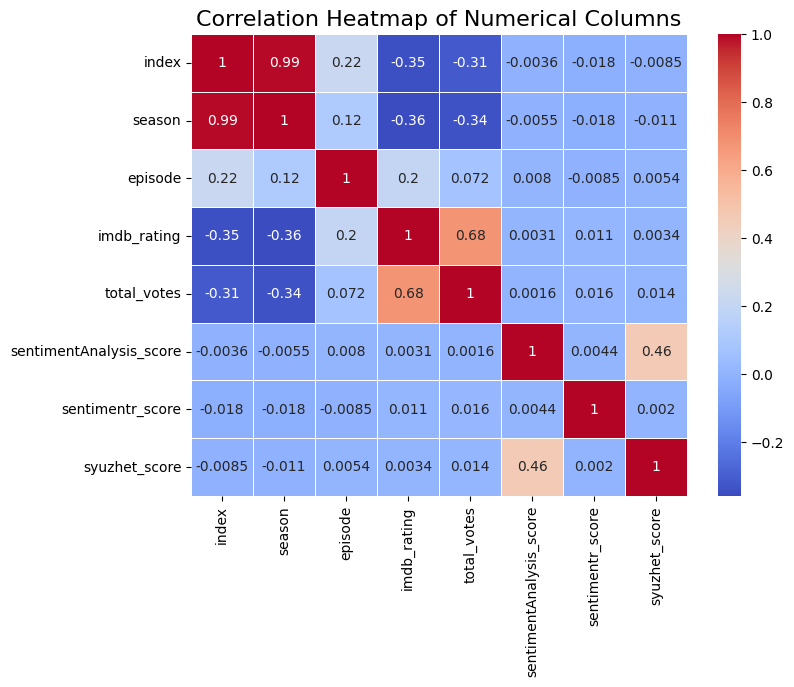

In [18]:
#A correlation graph of all numerical columns

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numerical_cols = office_df_clean.select_dtypes(include=np.number).columns
#numerical_cols = office_df_clean.groupby(['season', 'episode_name'])['sentimentAnalysis_score'].mean()
df_numerical = office_df_clean[numerical_cols]

# Plot the heatmap of the correlation matrix of numerical columns
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Columns", fontsize=16)
plt.show()

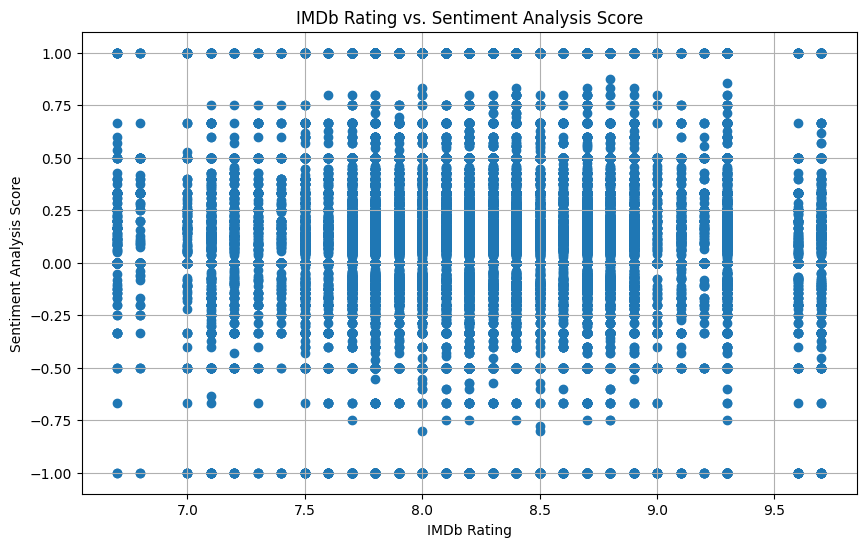

In [19]:
#Graph of imdb ratins vs. sentiment Analysis score

grouped_seasonEpisode = office_df_clean.groupby('season')['character'].sum()

#office_df_clean.groupby(['season', 'episode_name'])['sentimentAnalysis_score'].mean()

#Plotting the imdbs and sentiment-score

plt.figure(figsize=(10, 6))
plt.scatter(office_df_clean['imdb_rating'], office_df_clean['sentimentAnalysis_score'])
plt.title("IMDb Rating vs. Sentiment Analysis Score")
plt.xlabel("IMDb Rating")
plt.ylabel("Sentiment Analysis Score")
plt.grid(True)
plt.show()

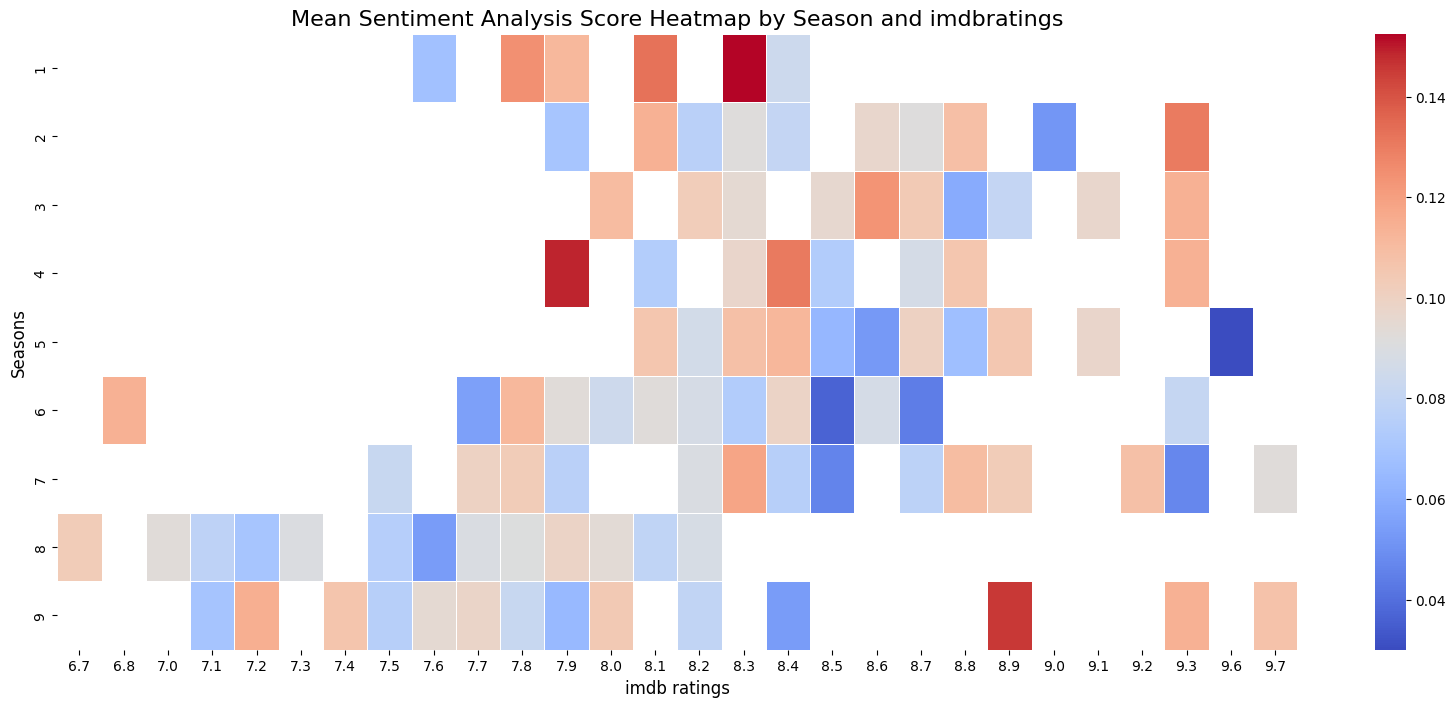

In [20]:
#make heatmap of season with imdb rating against sentimentAnalysis-score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean sentiment score for each episode in each season
sentiment_by_imdb = office_df_clean.groupby(['season', 'imdb_rating'])['sentimentAnalysis_score'].mean().reset_index()

# Pivot the data to create a matrix suitable for a heatmap
sentiment_pivot = sentiment_by_imdb.pivot(index='season', columns='imdb_rating', values='sentimentAnalysis_score')

# Plot the heatmap
plt.figure(figsize=(20, 8))  # Set the figure size to accommodate more characters
sns.heatmap(sentiment_pivot, annot=False, cmap='coolwarm', linewidths=0.5) # annot=False to avoid clutter

plt.title("Mean Sentiment Analysis Score Heatmap by Season and imdbratings", fontsize=16)
plt.xlabel("imdb ratings", fontsize=12)
plt.ylabel("Seasons", fontsize=12)
plt.show()

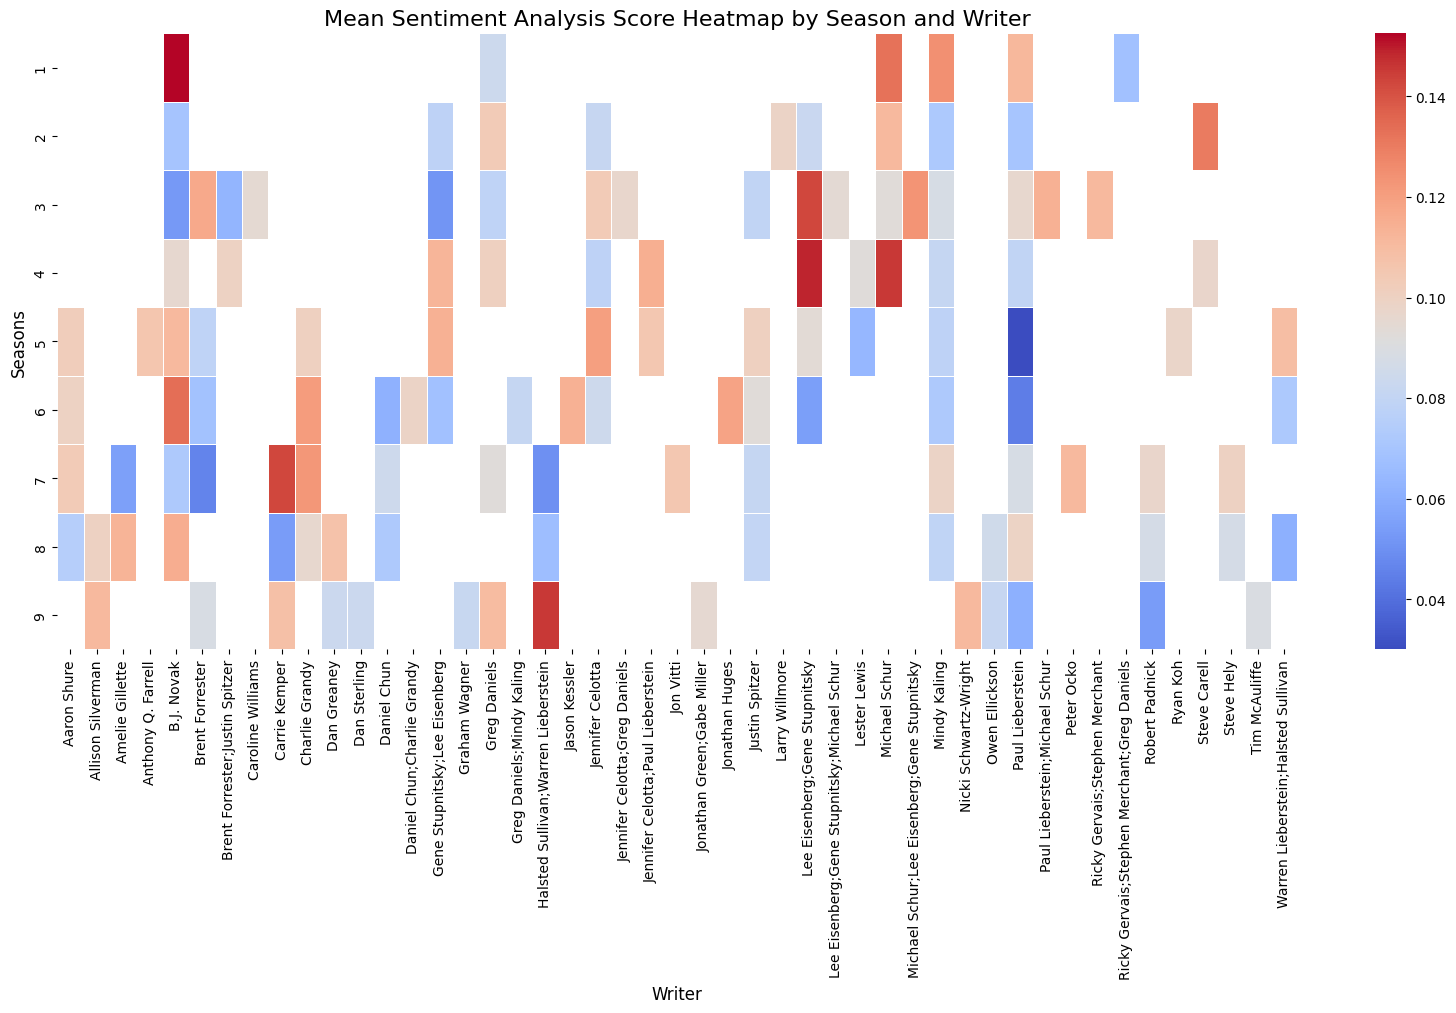

In [21]:
#make heatmap of season with writer against sentimentAnalysis_score

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean sentiment score for each writer in each season
sentiment_by_writer_season = office_df_clean.groupby(['season', 'writer'])['sentimentAnalysis_score'].mean().reset_index()

# Pivot the data to create a matrix suitable for a heatmap
sentiment_pivot_writer = sentiment_by_writer_season.pivot(index='season', columns='writer', values='sentimentAnalysis_score')

# Plot the heatmap
plt.figure(figsize=(20, 8))  # Set the figure size to accommodate more writers
sns.heatmap(sentiment_pivot_writer, annot=False, cmap='coolwarm', linewidths=0.5) # annot=False to avoid clutter

plt.title("Mean Sentiment Analysis Score Heatmap by Season and Writer", fontsize=16)
plt.xlabel("Writer", fontsize=12)
plt.ylabel("Seasons", fontsize=12)
plt.show()

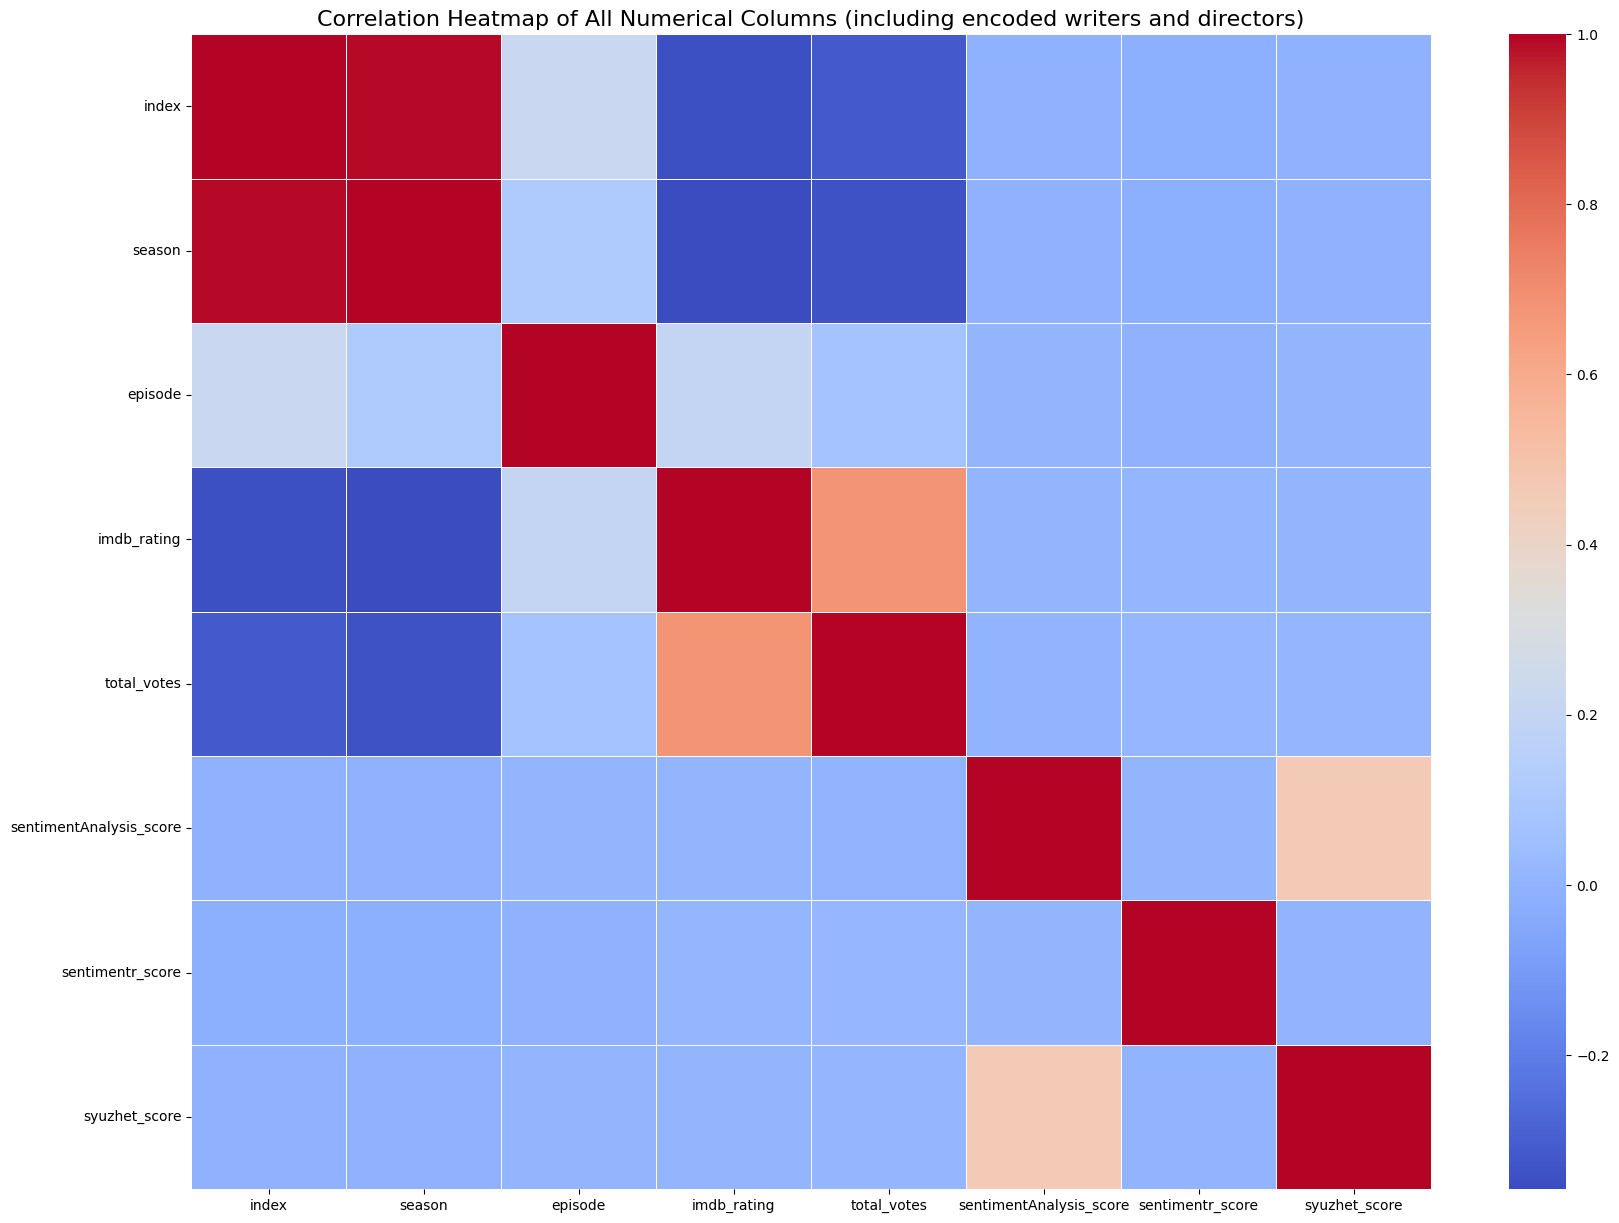

In [22]:
# Convert 'writer' and 'director' columns to numerical using one-hot encoding
office_df_encoded = pd.get_dummies(office_df_clean, columns=['writer', 'director'], drop_first=True)

# Select only numerical columns from the encoded DataFrame
numerical_cols_encoded = office_df_encoded.select_dtypes(include=np.number).columns
df_numerical_encoded = office_df_encoded[numerical_cols_encoded]

# Calculate the correlation matrix
correlation_matrix_encoded = df_numerical_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(20, 15))  # Adjust figure size as needed
sns.heatmap(correlation_matrix_encoded, annot=False, cmap='coolwarm', linewidths=0.5) # annot=False for readability with many columns

plt.title("Correlation Heatmap of All Numerical Columns (including encoded writers and directors)", fontsize=16)
plt.show()

#Statical Analysis

In [23]:
#get overview of descriptive statics from dataset
office_df_clean.describe()

,index,season,episode,imdb_rating,total_votes,sentimentAnalysis_score,sentimentr_score,syuzhet_score
count,54753.000000,54753.000000,54753.000000,54753.000000,54753.000000,54753.000000,54753.000000,54753.000000
mean,27555.824101,5.536957,12.554983,8.301868,2173.774259,0.091934,0.060453,0.241815
std,15911.845049,2.342346,7.294605,0.549570,892.822125,0.309862,0.263524,0.709950
min,1.000000,1.000000,1.000000,6.700000,1393.000000,-1.000000,-2.236068,-5.000000
25%,13771.000000,3.000000,6.000000,7.900000,1633.000000,0.000000,0.000000,0.000000
50%,27568.000000,6.000000,12.000000,8.300000,1962.000000,0.000000,0.000000,0.000000
75%,41348.000000,7.000000,19.000000,8.700000,2403.000000,0.200000,0.125000,0.600000
max,55130.000000,9.000000,28.000000,9.700000,7934.000000,1.000000,2.645751,7.750000


In [24]:
#get overview of descriptive statics from dataset

numeric_cols = office_df_clean.select_dtypes(include='number').columns

print(office_df_clean.groupby('season').agg({'sentimentAnalysis_score': 'mean'}))

        sentimentAnalysis_score
season                         
1                      0.112656
2                      0.087048
3                      0.095285
4                      0.101877
5                      0.092251
6                      0.084549
7                      0.092080
8                      0.086574
9                      0.094445


In [25]:
#rechecking for any missing data
print("5. Missing Values:")
print(office_df_clean.isna().mean() * 100)

5. Missing Values:
index                      0.0
season                     0.0
episode                    0.0
episode_name               0.0
director                   0.0
writer                     0.0
character                  0.0
text                       0.0
text_w_direction           0.0
imdb_rating                0.0
total_votes                0.0
air_date                   0.0
sentimentAnalysis_score    0.0
sentimentr_score           0.0
syuzhet_score              0.0
dtype: float64


In [26]:
#Subset DF

office_df_main = office_df_clean[['season', 'episode_name', 'character', 'text', 'text_w_direction', 'imdb_rating', 'sentimentAnalysis_score', "writer"]]

seasons = office_df_main['season']
writers = office_df_main['writer']
sentimentAnalysis = office_df_main['sentimentAnalysis_score']

writers_season = office_df_main.groupby('season')['imdb_rating'].mean()
sentimentAnalysis_season = office_df_main.groupby('season')['sentimentAnalysis_score'].mean()

One-Way ANOVA F-statistic: 1.8250470225435886
One-Way ANOVA p-value: 0.0005386148563408512
Reject the null hypothesis (p < 0.05). There is a significant difference in mean sentiment analysis score among different writers.


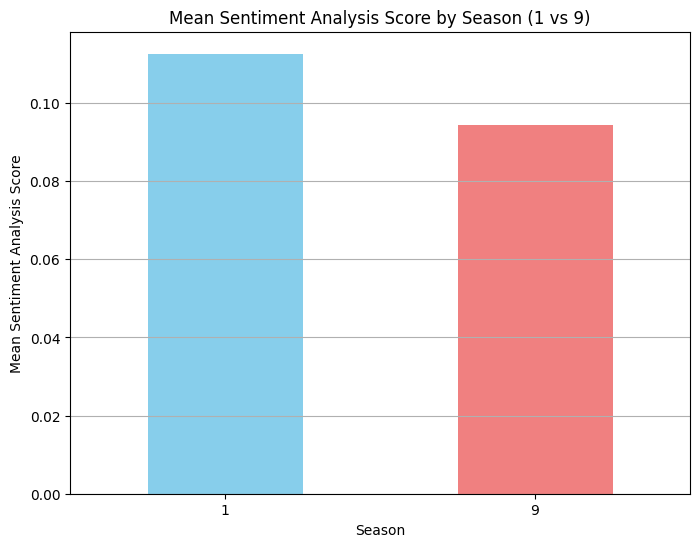

In [27]:
from scipy import stats

# Get the list of unique writers
writers = office_df_clean['writer'].unique()

# Create a list of sentiment scores for each writer
sentiment_by_writer = [office_df_clean[office_df_clean['writer'] == writer]['sentimentAnalysis_score'] for writer in writers]

# Perform one-way ANOVA test

f_statistic, p_value = stats.f_oneway(*sentiment_by_writer)

print(f"One-Way ANOVA F-statistic: {f_statistic}")
print(f"One-Way ANOVA p-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis (p < {alpha}). There is a significant difference in mean sentiment analysis score among different writers.")
else:
    print(f"Fail to reject the null hypothesis (p >= {alpha}). There is no significant difference in mean sentiment analysis score among different writers.")

    # Add a bar plot to visualize the mean sentiment scores
mean_sentiment_by_season = office_df_clean[office_df_clean['season'].isin([1, 9])].groupby('season')['sentimentAnalysis_score'].mean()

plt.figure(figsize=(8, 6))
mean_sentiment_by_season.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Mean Sentiment Analysis Score by Season (1 vs 9)")
plt.xlabel("Season")
plt.ylabel("Mean Sentiment Analysis Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

mean squared error:  0.09546964278072631
mean absolute error:  0.20734171170613552
r squared:  -0.00024136578926015062


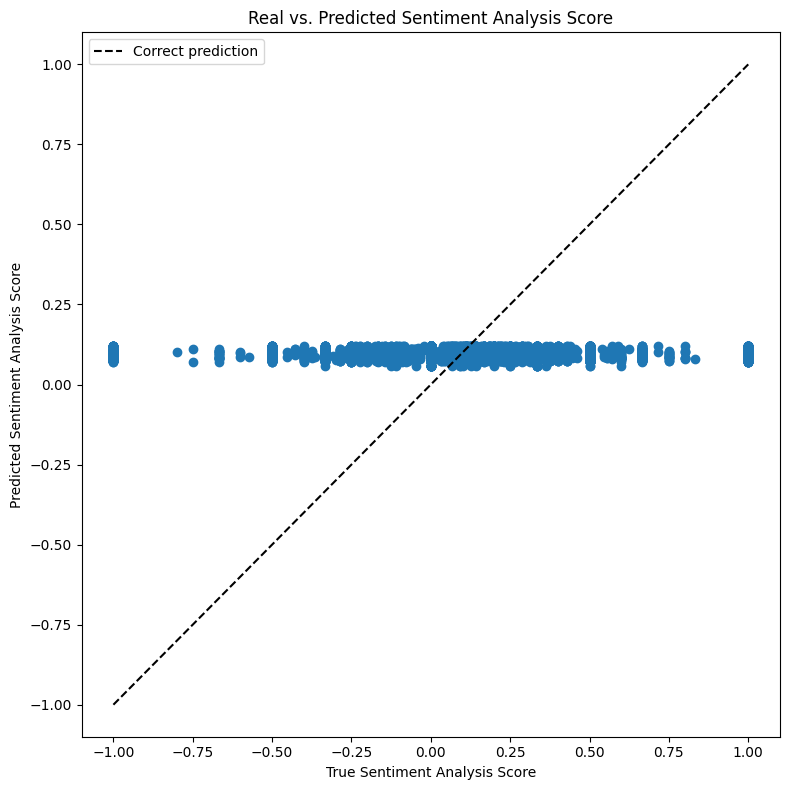

In [28]:
# Make a linear regression model of the data

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from scipy.stats import ttest_rel
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# split dataset to X/Y

features = office_df_main[['season', 'writer']]

# Convert 'writer' to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['writer'], drop_first=True)
#features = pd.get_dummies(features, columns=['character'], drop_first=True)
#features = pd.get_dummies(features, columns=['text'], drop_first=True)


label = office_df_main['sentimentAnalysis_score']

# Split the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size = 0.2, random_state = 2025)

from sklearn.linear_model import LinearRegression

# Train Linear Regression and
model1 = LinearRegression()

model1.fit(X_train, y_train)

# Generate predictions
y_pred = model1.predict(X_test)

#Plot LinearRegression
plt.figure(figsize=(8, 8))


plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")


plt.xlabel('True Sentiment Analysis Score')
plt.ylabel('Predicted Sentiment Analysis Score')
plt.title("Real vs. Predicted Sentiment Analysis Score")

plt.axis('tight')
plt.legend()
plt.tight_layout()

#evaluate model
y_true = y_test # Define y_true for clarity

print('mean squared error: ', mean_squared_error(y_true, y_pred))

print('mean absolute error: ', mean_absolute_error(y_true, y_pred))
print('r squared: ', r2_score(y_true, y_pred))

# learned that the linear model didn't perform as well and the tree model is simlar, which leads to a insight that the writers and seasons arent't the most driven factors.

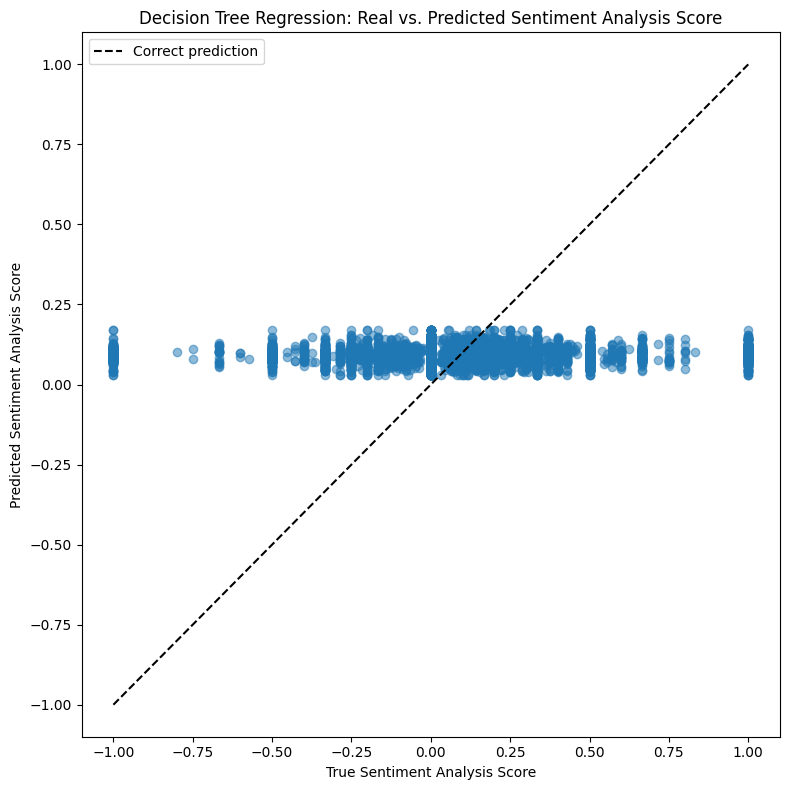

Decision Tree Regression Metrics:
Mean squared error:  0.09547758674388265
Mean absolute error:  0.20684301892317752
R squared:  -0.00032459518371297236


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# split dataset to X/Y
features = office_df_main[['season', 'writer']]

# Convert 'writer' to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['writer'], drop_first=True)

label = office_df_main['sentimentAnalysis_score']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=2025)

# Train a Decision Tree Regressor model
model_tree = DecisionTreeRegressor(random_state=2025)
model_tree.fit(X_train, y_train)

# Generate predictions
y_pred_tree = model_tree.predict(X_test)

# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")
plt.xlabel('True Sentiment Analysis Score')
plt.ylabel('Predicted Sentiment Analysis Score')
plt.title("Decision Tree Regression: Real vs. Predicted Sentiment Analysis Score")
plt.axis('tight')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
print('Decision Tree Regression Metrics:')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_tree))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_tree))
print('R squared: ', r2_score(y_test, y_pred_tree))

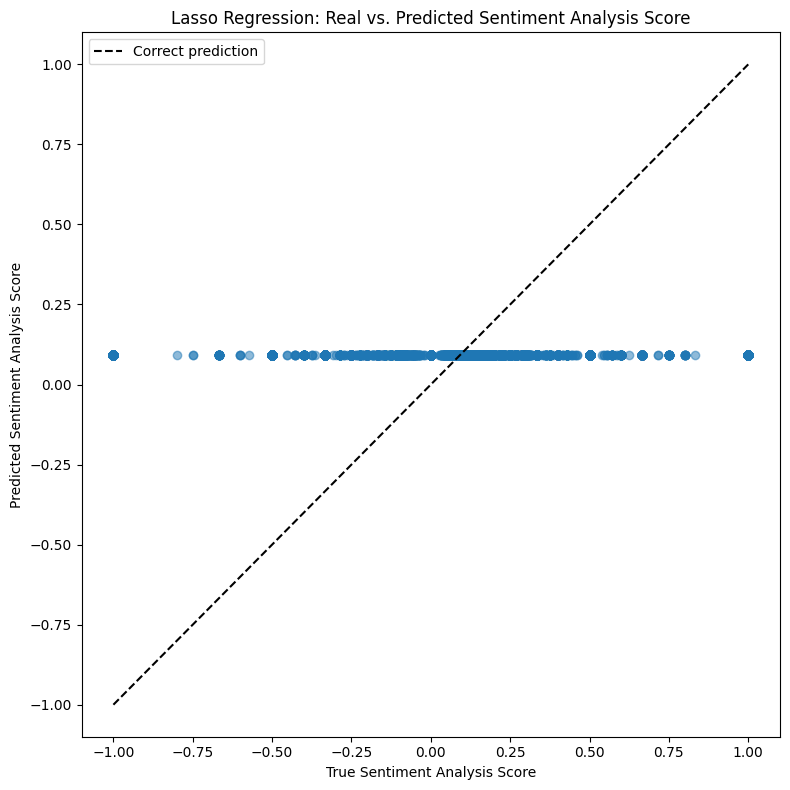

Lasso Regression Metrics:
Mean squared error:  0.09546150582571829
Mean absolute error:  0.20740565393002575
R squared:  -0.00015611440721308156


In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/dsollberger/quartoblog/master/posts/office_sentiment/office_sentiment.csv'
office_df = pd.read_csv(url)


# Define office_df_clean by handling missing values and dropping duplicates
mean_sentiment = office_df['sentimentAnalysis_score'].median()
office_df['sentimentAnalysis_score'] = office_df['sentimentAnalysis_score'].fillna(mean_sentiment)
office_df_clean = office_df.dropna(subset=['text', 'text_w_direction'])
office_df_clean = office_df_clean.drop_duplicates()

# Define office_df_main
office_df_main = office_df_clean[['season', 'episode_name', 'character', 'text', 'text_w_direction', 'imdb_rating', 'sentimentAnalysis_score', "writer"]]

# Reuse the features and label defined earlier
features = office_df_main[['season', 'writer']]
features = pd.get_dummies(features, columns=['writer'], drop_first=True)
label = office_df_main['sentimentAnalysis_score']

# Split the dataset (using the same split as before for consistent comparison)
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=2025)

# Train a Lasso Regression model
# You can adjust the 'alpha' parameter to control the strength of regularization
model_lasso = Lasso(alpha=1.0, random_state=2025)
model_lasso.fit(X_train, y_train)

# Generate predictions
y_pred_lasso = model_lasso.predict(X_test)

# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")
plt.xlabel('True Sentiment Analysis Score')
plt.ylabel('Predicted Sentiment Analysis Score')
plt.title("Lasso Regression: Real vs. Predicted Sentiment Analysis Score")
plt.axis('tight')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
print('Lasso Regression Metrics:')
print('Mean squared error: ', mean_squared_error(y_test, y_pred_lasso))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_lasso))
print('R squared: ', r2_score(y_test, y_pred_lasso))